In [2]:
!pip install keras
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np # linear algebra
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import math   
from datetime import datetime, date 
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

print("Setup Complete")

Setup Complete


In [2]:
#모델불러오기
dam = pd.read_csv("C:/Users/owner/Desktop/4_dam_a.csv", encoding= 'cp949')
dam.head()

,일시,댐수위(ELm),강우량(mm),유입량(㎡/sec),총방류량(㎡/sec),댐수위(ELm).1,강우량(mm).1,유입량(㎡/sec).1,총방류량(㎡/sec).1,댐수위(ELm).2,강우량(mm).2,유입량(㎡/sec).2,총방류량(㎡/sec).2
0,2002-01-01 0:00,178.59,0.4,0.4,0.4,92.74,0.1,1.8,2.6,92.69,0.0,6.8,32.1
1,2002-01-01 1:00,178.59,1.0,0.9,0.9,92.73,0.0,1.2,2.6,92.71,0.0,15.6,11.3
2,2002-01-01 2:00,178.59,0.8,0.9,0.9,92.73,0.0,1.5,2.2,92.71,0.0,10.1,0.0
3,2002-01-01 3:00,178.59,0.0,0.9,0.9,92.73,0.0,1.7,2.2,92.71,0.0,9.8,0.0
4,2002-01-01 4:00,178.59,0.4,0.9,0.9,92.73,0.0,1.9,2,92.72,0.0,8.7,0.0


In [3]:
dam.columns = ['date', 'water_level', 'rainfall', 'inflow', 'outflow', 'water_level2', 'rainfall2', 'inflow2', 'outflow2','water_level3', 'rainfall3', 'inflow3', 'outflow3']
dam.head()

,date,water_level,rainfall,inflow,outflow,water_level2,rainfall2,inflow2,outflow2,water_level3,rainfall3,inflow3,outflow3
0,2002-01-01 0:00,178.59,0.4,0.4,0.4,92.74,0.1,1.8,2.6,92.69,0.0,6.8,32.1
1,2002-01-01 1:00,178.59,1.0,0.9,0.9,92.73,0.0,1.2,2.6,92.71,0.0,15.6,11.3
2,2002-01-01 2:00,178.59,0.8,0.9,0.9,92.73,0.0,1.5,2.2,92.71,0.0,10.1,0.0
3,2002-01-01 3:00,178.59,0.0,0.9,0.9,92.73,0.0,1.7,2.2,92.71,0.0,9.8,0.0
4,2002-01-01 4:00,178.59,0.4,0.9,0.9,92.73,0.0,1.9,2,92.72,0.0,8.7,0.0


In [4]:
# #숫자로 변환 (필요할 경우 사용)
# dam['inflow'] = pd.to_numeric(dam['inflow'],errors='coerce')
# dam['outflow'] = pd.to_numeric(dam['outflow'],errors='coerce')
# dam['inflow2'] = pd.to_numeric(dam['inflow2'],errors='coerce')
# dam['outflow2'] = pd.to_numeric(dam['outflow2'],errors='coerce')
# dam['inflow3'] = pd.to_numeric(dam['inflow3'],errors='coerce')
# dam['outflow3'] = pd.to_numeric(dam['outflow3'],errors='coerce')

In [6]:
#결측값 확인
print(dam.isnull().sum())

date              0
water_level       0
rainfall         11
inflow          244
outflow          55
water_level2      0
rainfall2         7
inflow2         400
outflow2         91
water_level3      0
rainfall3        91
inflow3          18
outflow3         10
dtype: int64


In [7]:
#결측값 제거
dam = dam.dropna(axis=0)

In [8]:
print(dam.isnull().sum())

date            0
water_level     0
rainfall        0
inflow          0
outflow         0
water_level2    0
rainfall2       0
inflow2         0
outflow2        0
water_level3    0
rainfall3       0
inflow3         0
outflow3        0
dtype: int64


In [9]:
dam.describe()

,water_level,rainfall,inflow,outflow,water_level2,rainfall2,inflow2,outflow2,water_level3,rainfall3,inflow3,outflow3
count,170771.00000,170771.000000,170771.000000,170771.000000,170771.000000,170771.000000,170771.000000,170771.000000,170771.000000,170771.000000,170771.000000,170771.000000
mean,185.62014,0.148595,19.639966,18.029866,99.307225,0.159569,25.230207,21.130150,97.426213,0.169796,13.541734,12.872886
std,5.64984,0.962132,52.579887,30.319538,4.709631,1.008761,59.631982,48.160698,4.644507,1.154557,15.753548,12.834851
min,0.00000,0.000000,-44.700000,0.000000,86.200000,0.000000,0.000000,-117.200000,0.000000,-6.000000,0.000000,0.000000
25%,182.43000,0.000000,1.500000,2.300000,95.950000,0.000000,7.500000,9.800000,94.420000,0.000000,0.000000,0.000000
50%,187.11000,0.000000,3.700000,9.800000,99.470000,0.000000,11.800000,13.100000,97.300000,0.000000,13.900000,13.700000
75%,189.80000,0.000000,25.200000,29.000000,102.790000,0.000000,19.400000,19.300000,101.070000,0.000000,17.300000,17.400000
max,195.91000,41.500000,992.600000,960.200000,109.450000,43.500000,997.000000,999.600000,107.260000,60.900000,557.800000,55.100000


In [10]:
# #사용할 데이터 범위 설정 (데이터의 범위가 잘못 되었을 경우 사용. 예를 들어 방류량이 음수이거나 수위가 0인 경우)

# dam=dam[dam['water_level']>100]
# dam=dam[dam['rainfall']>=0]
# dam=dam[dam['inflow']>=0]
# dam=dam[dam['outflow']>=0]

# dam=dam[dam['rainfall2']>=0]
# dam=dam[dam['inflow2']>=0]
# dam=dam[dam['outflow2']>=0]

# dam=dam[dam['water_level3']>0]
# dam=dam[dam['rainfall3']>=0]
# dam=dam[dam['inflow3']>=0]
# dam=dam[dam['outflow3']>=0]

In [3]:
#dam.describe()

In [ ]:
dam = dam.reset_index(drop=True)

# 변수간의 관계 분석

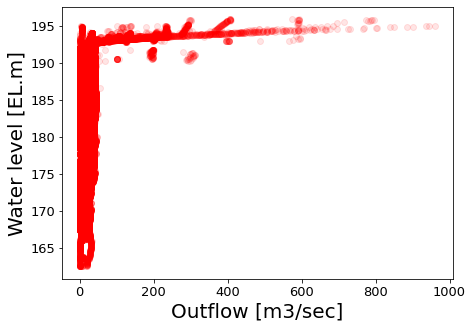

In [12]:
plt.figure(figsize=(7,5))
y= dam['water_level']
x= dam['outflow']
plt.plot(70,195)
plt.plot(x,y, 'ro', alpha = 0.1)
plt.xlabel('Outflow [m3/sec]', fontsize = 20)
plt.ylabel('Water level [EL.m]', fontsize = 20)
plt.xlim
plt.ylim
plt.xticks(fontsize =13)
plt.yticks(fontsize =13)
plt.show()

In [14]:
#correlation 확인
print(np.corrcoef(dam['inflow'],dam['water_level']))
print(np.corrcoef(dam['rainfall'],dam['water_level']))
print(np.corrcoef(dam['outflow'],dam['water_level']))

print(np.corrcoef(dam['inflow2'],dam['water_level2']))
print(np.corrcoef(dam['rainfall2'],dam['water_level2']))
print(np.corrcoef(dam['outflow2'],dam['water_level2']))

print(np.corrcoef(dam['inflow3'],dam['water_level3']))
print(np.corrcoef(dam['rainfall3'],dam['water_level3']))
print(np.corrcoef(dam['outflow3'],dam['water_level3']))

[[1.         0.09874672]
 [0.09874672 1.        ]]
[[ 1.        -0.0203335]
 [-0.0203335  1.       ]]
[[1.         0.14535126]
 [0.14535126 1.        ]]
[[1.         0.18440477]
 [0.18440477 1.        ]]
[[ 1.         -0.00682638]
 [-0.00682638  1.        ]]
[[1.         0.23562561]
 [0.23562561 1.        ]]
[[ 1.         -0.04020758]
 [-0.04020758  1.        ]]
[[ 1.         -0.03552619]
 [-0.03552619  1.        ]]
[[ 1.         -0.05518219]
 [-0.05518219  1.        ]]


# Remove Outlier

극한값이 예측 성능을 현저히 저하시킬 때, 필요한 경우 극한값을 제거함

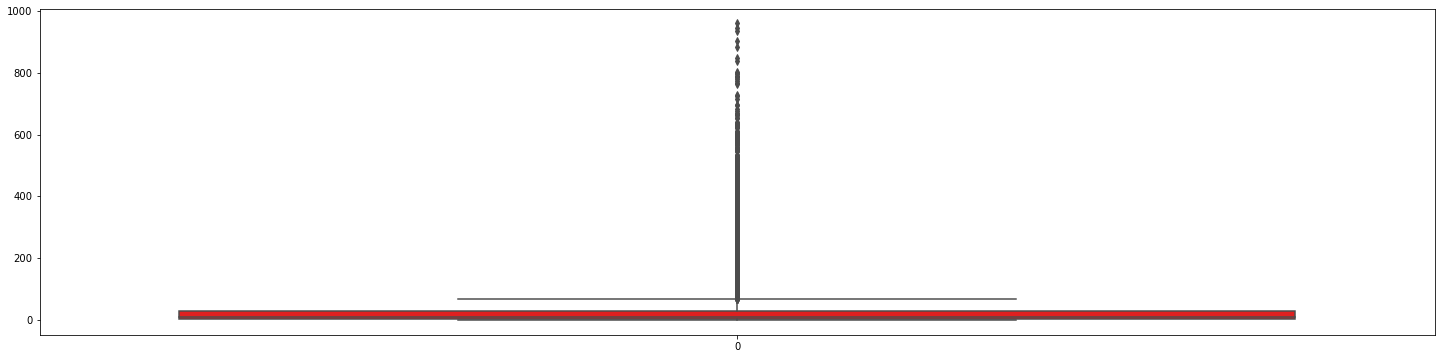

In [15]:
plt.figure(figsize=(25,6))
sns.boxplot(data=dam['outflow'], color='red')
plt.show()

In [16]:
#remove outlier

Q1 = dam['outflow'].quantile(0.25)
Q3 = dam['outflow'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (dam['outflow'] >= Q1 - 1.5 * IQR) & (dam['outflow'] <= Q3 + 1.5 *IQR)
dam = dam.loc[filter]
print(dam['outflow'].describe())
print('\n')
print(dam['outflow'].describe())

count    168305.000000
mean         15.420307
std          13.915462
min           0.000000
25%           2.300000
50%           8.300000
75%          28.500000
max          68.900000
Name: outflow, dtype: float64


count    168305.000000
mean         15.420307
std          13.915462
min           0.000000
25%           2.300000
50%           8.300000
75%          28.500000
max          68.900000
Name: outflow, dtype: float64


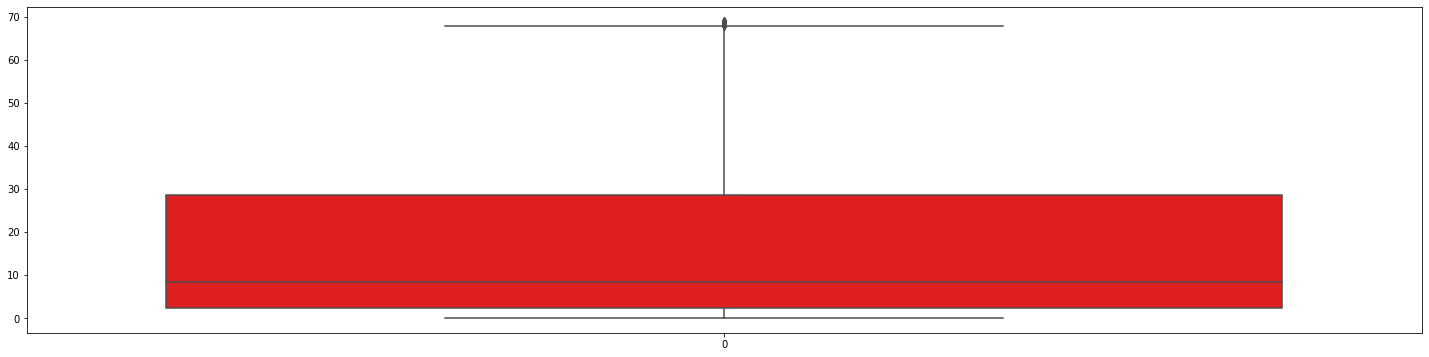

In [17]:
plt.figure(figsize=(25,6))
sns.boxplot(data=dam['outflow'], color='red')
plt.show()

In [18]:
dam = dam.reset_index(drop=True)

# 시간(날짜) 데이터 처리

In [19]:
dam["date"] = pd.to_datetime(dam["date"])
dam.index = dam["date"]

In [21]:
dam.head()

,date,water_level,rainfall,inflow,outflow,water_level2,rainfall2,inflow2,outflow2,water_level3,rainfall3,inflow3,outflow3
date,,,,,,,,,,,,,
2002-01-01 00:00:00,2002-01-01 00:00:00,178.59,0.4,0.4,0.4,92.74,0.1,1.8,2.6,92.69,0.0,6.8,32.1
2002-01-01 01:00:00,2002-01-01 01:00:00,178.59,1.0,0.9,0.9,92.73,0.0,1.2,2.6,92.71,0.0,15.6,11.3
2002-01-01 02:00:00,2002-01-01 02:00:00,178.59,0.8,0.9,0.9,92.73,0.0,1.5,2.2,92.71,0.0,10.1,0.0
2002-01-01 03:00:00,2002-01-01 03:00:00,178.59,0.0,0.9,0.9,92.73,0.0,1.7,2.2,92.71,0.0,9.8,0.0
2002-01-01 04:00:00,2002-01-01 04:00:00,178.59,0.4,0.9,0.9,92.73,0.0,1.9,2.0,92.72,0.0,8.7,0.0


# 데이터 시각화

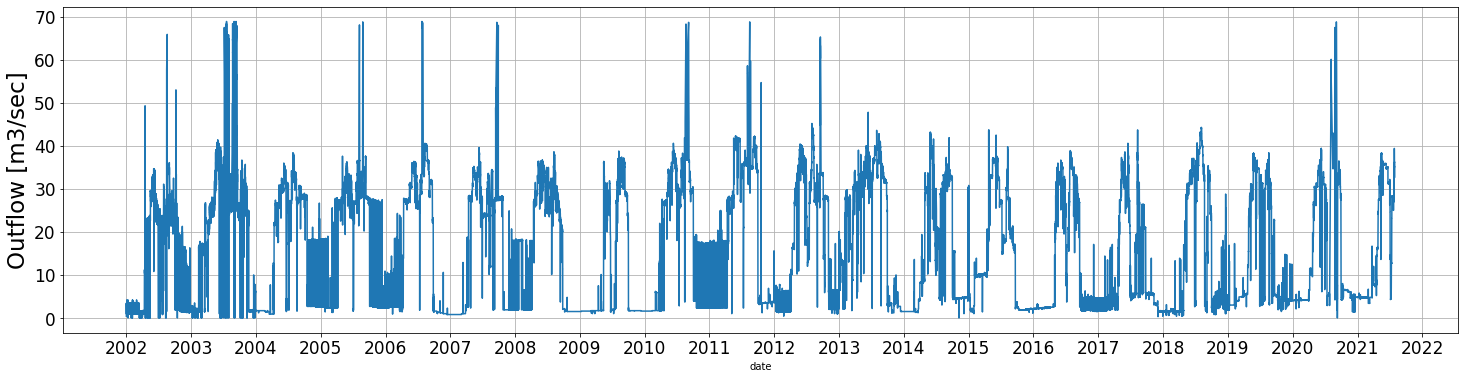

In [22]:
plt.figure(figsize=(25,6))

dam_o = sns.lineplot(data=dam['outflow'])
plt.ylabel('Outflow [m3/sec]',fontsize =23)
plt.xticks(fontsize =17)
plt.yticks(fontsize =17)
plt.grid(True)  
dam_o.xaxis.set_major_locator(mdates.YearLocator())
dam_o.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# 데이터 정규화 Normalization

데이터의 범위를 0에서 1로 변경하여 데이터 값들의 편차를 줄임

In [23]:
dam

,date,water_level,rainfall,inflow,outflow,water_level2,rainfall2,inflow2,outflow2,water_level3,rainfall3,inflow3,outflow3
date,,,,,,,,,,,,,
2002-01-01 00:00:00,2002-01-01 00:00:00,178.59,0.4,0.4,0.4,92.74,0.1,1.8,2.6,92.69,0.0,6.8,32.1
2002-01-01 01:00:00,2002-01-01 01:00:00,178.59,1.0,0.9,0.9,92.73,0.0,1.2,2.6,92.71,0.0,15.6,11.3
2002-01-01 02:00:00,2002-01-01 02:00:00,178.59,0.8,0.9,0.9,92.73,0.0,1.5,2.2,92.71,0.0,10.1,0.0
2002-01-01 03:00:00,2002-01-01 03:00:00,178.59,0.0,0.9,0.9,92.73,0.0,1.7,2.2,92.71,0.0,9.8,0.0
2002-01-01 04:00:00,2002-01-01 04:00:00,178.59,0.4,0.9,0.9,92.73,0.0,1.9,2.0,92.72,0.0,8.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-28 12:00:00,2021-07-28 12:00:00,185.02,0.0,0.0,36.2,102.86,0.0,20.6,20.6,100.10,0.0,9.5,9.5
2021-07-28 13:00:00,2021-07-28 13:00:00,185.01,0.0,0.0,36.2,102.86,0.0,20.6,20.6,100.11,0.0,26.1,9.5
2021-07-28 14:00:00,2021-07-28 14:00:00,185.00,0.0,0.0,36.2,102.86,0.0,21.3,21.3,100.11,0.0,9.5,9.5


In [24]:
features = dam[['water_level', 'rainfall', 'inflow', 'outflow', 'water_level2', 'rainfall2', 'inflow2', 'outflow2','water_level3', 'rainfall3', 'inflow3', 'outflow3']]
print(features)

                     water_level  rainfall  inflow  outflow  water_level2  \
date                                                                        
2002-01-01 00:00:00       178.59       0.4     0.4      0.4         92.74   
2002-01-01 01:00:00       178.59       1.0     0.9      0.9         92.73   
2002-01-01 02:00:00       178.59       0.8     0.9      0.9         92.73   
2002-01-01 03:00:00       178.59       0.0     0.9      0.9         92.73   
2002-01-01 04:00:00       178.59       0.4     0.9      0.9         92.73   
...                          ...       ...     ...      ...           ...   
2021-07-28 12:00:00       185.02       0.0     0.0     36.2        102.86   
2021-07-28 13:00:00       185.01       0.0     0.0     36.2        102.86   
2021-07-28 14:00:00       185.00       0.0     0.0     36.2        102.86   
2021-07-28 15:00:00       185.00       0.0    36.1     36.1        102.85   
2021-07-28 16:00:00       184.99       0.0     0.0     36.2        102.85   

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(features)
dam_scaled=scaler.transform(features)

dam_scaled=pd.DataFrame(data=dam_scaled, columns=list(features))
print('feature 최솟값')
print(dam_scaled.min())
print('\n''fearure 최댓값')
print(dam_scaled.max())

feature 최솟값
water_level     0.0
rainfall        0.0
inflow          0.0
outflow         0.0
water_level2    0.0
rainfall2       0.0
inflow2         0.0
outflow2        0.0
water_level3    0.0
rainfall3       0.0
inflow3         0.0
outflow3        0.0
dtype: float64

fearure 최댓값
water_level     1.0
rainfall        1.0
inflow          1.0
outflow         1.0
water_level2    1.0
rainfall2       1.0
inflow2         1.0
outflow2        1.0
water_level3    1.0
rainfall3       1.0
inflow3         1.0
outflow3        1.0
dtype: float64


# 입력 변수의 관계를 이용하여  저수량 변화를 계산: Rainfall + Inflow - Outflow

In [26]:
dam['variation'] = 0
for i, idx in enumerate(dam.index):
    dam.loc[idx, 'variation'] = dam_scaled['rainfall'][i]+dam_scaled['inflow'][i]-dam_scaled['outflow'][i]

In [27]:
dam['variation2'] = 0
for i, idx in enumerate(dam.index):
    dam.loc[idx, 'variation2'] = dam_scaled['rainfall2'][i]+dam_scaled['inflow2'][i]-dam_scaled['outflow2'][i]

In [28]:
dam['variation3'] = 0
for i, idx in enumerate(dam.index):
    dam.loc[idx, 'variation3'] = dam_scaled['rainfall3'][i]+dam_scaled['inflow3'][i]-dam_scaled['outflow3'][i]

In [29]:
dam_scaled

,water_level,rainfall,inflow,outflow,water_level2,rainfall2,inflow2,outflow2,water_level3,rainfall3,inflow3,outflow3
0,0.495062,0.009639,0.000403,0.005806,0.281290,0.002299,0.001805,0.003605,0.325463,0.0,0.012191,0.582577
1,0.495062,0.024096,0.000907,0.013062,0.280860,0.000000,0.001204,0.003605,0.326389,0.0,0.027967,0.205082
2,0.495062,0.019277,0.000907,0.013062,0.280860,0.000000,0.001505,0.003050,0.326389,0.0,0.018107,0.000000
3,0.495062,0.000000,0.000907,0.013062,0.280860,0.000000,0.001705,0.003050,0.326389,0.0,0.017569,0.000000
4,0.495062,0.009639,0.000907,0.013062,0.280860,0.000000,0.001906,0.002773,0.326852,0.0,0.015597,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
168300,0.693519,0.000000,0.000000,0.525399,0.716559,0.000000,0.020662,0.028564,0.668519,0.0,0.017031,0.172414
168301,0.693210,0.000000,0.000000,0.525399,0.716559,0.000000,0.020662,0.028564,0.668981,0.0,0.046791,0.172414
168302,0.692901,0.000000,0.000000,0.525399,0.716559,0.000000,0.021364,0.029534,0.668981,0.0,0.017031,0.172414
168303,0.692901,0.000000,0.036369,0.523948,0.716129,0.000000,0.000000,0.030089,0.668981,0.0,0.016852,0.170599


In [30]:
dam = dam.reset_index(drop=True)

In [31]:
df = dam['variation']
df

0         0.004236
1         0.011941
2         0.007121
3        -0.012156
4        -0.002517
            ...   
168300   -0.525399
168301   -0.525399
168302   -0.525399
168303   -0.487579
168304   -0.525399
Name: variation, Length: 168305, dtype: float64

In [32]:
ds_list = []

for i in range(1,len(df)):
    ds = df[i]-df[i-1]
    ds_list.append(ds)
    
ds_dt = pd.DataFrame(ds_list)

In [33]:
ds_dt.columns = ['ds_dt']
print(ds_dt)

           ds_dt
0       0.007705
1      -0.004819
2      -0.019277
3       0.009639
4      -0.000672
...          ...
168299 -0.036470
168300  0.000000
168301  0.000000
168302  0.037821
168303 -0.037821

[168304 rows x 1 columns]


In [34]:
ds_dt['ds_dt'] = pd.to_numeric(ds_dt['ds_dt'],errors='coerce')
print(ds_dt)

           ds_dt
0       0.007705
1      -0.004819
2      -0.019277
3       0.009639
4      -0.000672
...          ...
168299 -0.036470
168300  0.000000
168301  0.000000
168302  0.037821
168303 -0.037821

[168304 rows x 1 columns]


In [35]:
df2 = dam['variation2']
df2

0         0.000499
1        -0.002401
2        -0.001546
3        -0.001345
4        -0.000867
            ...   
168300   -0.007902
168301   -0.007902
168302   -0.008170
168303   -0.030089
168304   -0.007978
Name: variation2, Length: 168305, dtype: float64

In [36]:
ds_list = []

for i in range(1,len(df2)):
    ds = df2[i]-df2[i-1]
    ds_list.append(ds)
    
ds_dt2 = pd.DataFrame(ds_list)

In [37]:
ds_dt2.columns = ['ds_dt2']
print(ds_dt2)

          ds_dt2
0      -0.002901
1       0.000856
2       0.000201
3       0.000478
4       0.000139
...          ...
168299  0.020662
168300  0.000000
168301 -0.000268
168302 -0.021919
168303  0.022111

[168304 rows x 1 columns]


In [38]:
ds_dt2['ds_dt2'] = pd.to_numeric(ds_dt2['ds_dt2'],errors='coerce')
print(ds_dt2)

          ds_dt2
0      -0.002901
1       0.000856
2       0.000201
3       0.000478
4       0.000139
...          ...
168299  0.020662
168300  0.000000
168301 -0.000268
168302 -0.021919
168303  0.022111

[168304 rows x 1 columns]


In [39]:
df3 = dam['variation3']
df3

0        -0.570386
1        -0.177115
2         0.018107
3         0.017569
4         0.015597
            ...   
168300   -0.155383
168301   -0.125623
168302   -0.155383
168303   -0.153747
168304   -0.152111
Name: variation3, Length: 168305, dtype: float64

In [40]:
ds_list = []

for i in range(1,len(df3)):
    ds = df3[i]-df3[i-1]
    ds_list.append(ds)
    
ds_dt3 = pd.DataFrame(ds_list)

In [41]:
ds_dt3.columns = ['ds_dt3']
print(ds_dt3)

          ds_dt3
0       0.393272
1       0.195222
2      -0.000538
3      -0.001972
4      -0.002510
...          ...
168299  0.000000
168300  0.029760
168301 -0.029760
168302  0.001636
168303  0.001636

[168304 rows x 1 columns]


In [42]:
ds_dt3['ds_dt3'] = pd.to_numeric(ds_dt3['ds_dt3'],errors='coerce')
print(ds_dt3)

          ds_dt3
0       0.393272
1       0.195222
2      -0.000538
3      -0.001972
4      -0.002510
...          ...
168299  0.000000
168300  0.029760
168301 -0.029760
168302  0.001636
168303  0.001636

[168304 rows x 1 columns]


In [43]:
dam = dam[1:]

In [44]:
dam_scaled = dam_scaled[1:]

In [45]:
dam = dam.reset_index(drop=True)
print(dam)

                      date  water_level  rainfall  inflow  outflow  \
0      2002-01-01 01:00:00       178.59       1.0     0.9      0.9   
1      2002-01-01 02:00:00       178.59       0.8     0.9      0.9   
2      2002-01-01 03:00:00       178.59       0.0     0.9      0.9   
3      2002-01-01 04:00:00       178.59       0.4     0.9      0.9   
4      2002-01-01 05:00:00       178.60       0.0     9.8      0.9   
...                    ...          ...       ...     ...      ...   
168299 2021-07-28 12:00:00       185.02       0.0     0.0     36.2   
168300 2021-07-28 13:00:00       185.01       0.0     0.0     36.2   
168301 2021-07-28 14:00:00       185.00       0.0     0.0     36.2   
168302 2021-07-28 15:00:00       185.00       0.0    36.1     36.1   
168303 2021-07-28 16:00:00       184.99       0.0     0.0     36.2   

        water_level2  rainfall2  inflow2  outflow2  water_level3  rainfall3  \
0              92.73        0.0      1.2       2.6         92.71        0.0   
1

In [46]:
dam_scaled = dam_scaled.reset_index(drop=True)
print(dam_scaled)

        water_level  rainfall    inflow   outflow  water_level2  rainfall2  \
0          0.495062  0.024096  0.000907  0.013062      0.280860        0.0   
1          0.495062  0.019277  0.000907  0.013062      0.280860        0.0   
2          0.495062  0.000000  0.000907  0.013062      0.280860        0.0   
3          0.495062  0.009639  0.000907  0.013062      0.280860        0.0   
4          0.495370  0.000000  0.009873  0.013062      0.280860        0.0   
...             ...       ...       ...       ...           ...        ...   
168299     0.693519  0.000000  0.000000  0.525399      0.716559        0.0   
168300     0.693210  0.000000  0.000000  0.525399      0.716559        0.0   
168301     0.692901  0.000000  0.000000  0.525399      0.716559        0.0   
168302     0.692901  0.000000  0.036369  0.523948      0.716129        0.0   
168303     0.692593  0.000000  0.000000  0.525399      0.716129        0.0   

         inflow2  outflow2  water_level3  rainfall3   inflow3  

In [47]:
dam['ds_dt'] = ds_dt
dam['ds_dt2'] = ds_dt2
dam['ds_dt3'] = ds_dt3

In [48]:
dam = dam.reset_index(drop=True)
print(dam)

                      date  water_level  rainfall  inflow  outflow  \
0      2002-01-01 01:00:00       178.59       1.0     0.9      0.9   
1      2002-01-01 02:00:00       178.59       0.8     0.9      0.9   
2      2002-01-01 03:00:00       178.59       0.0     0.9      0.9   
3      2002-01-01 04:00:00       178.59       0.4     0.9      0.9   
4      2002-01-01 05:00:00       178.60       0.0     9.8      0.9   
...                    ...          ...       ...     ...      ...   
168299 2021-07-28 12:00:00       185.02       0.0     0.0     36.2   
168300 2021-07-28 13:00:00       185.01       0.0     0.0     36.2   
168301 2021-07-28 14:00:00       185.00       0.0     0.0     36.2   
168302 2021-07-28 15:00:00       185.00       0.0    36.1     36.1   
168303 2021-07-28 16:00:00       184.99       0.0     0.0     36.2   

        water_level2  rainfall2  inflow2  outflow2  water_level3  rainfall3  \
0              92.73        0.0      1.2       2.6         92.71        0.0   
1

In [49]:
dam["date"] = pd.to_datetime(dam["date"])

In [50]:
dam.index = dam["date"]

# 데이터 시각화

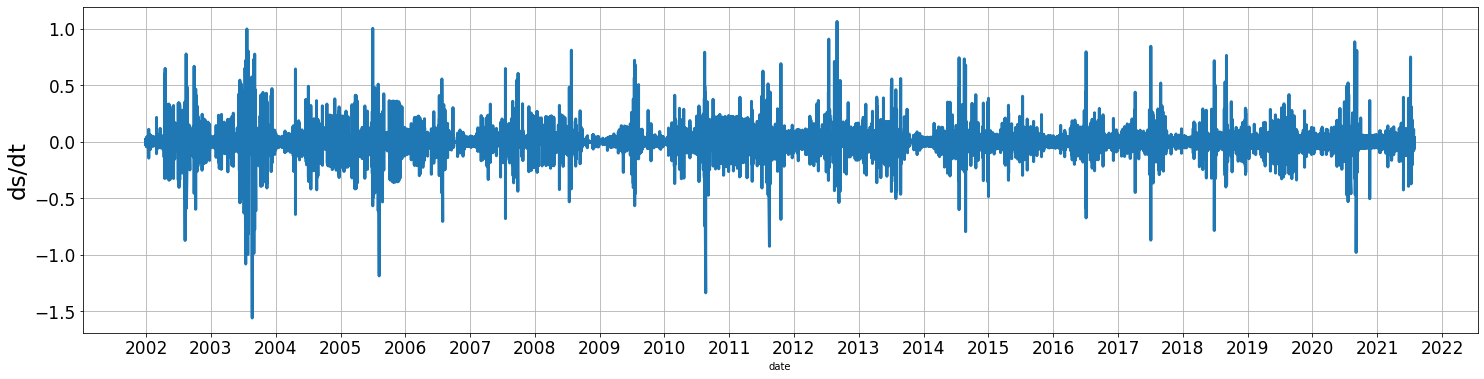

In [52]:
plt.figure(figsize=(25,6))

dam_o = sns.lineplot(data=dam['ds_dt'], linewidth=3)
plt.ylabel('ds/dt',fontsize = 23)
#plt.xlabel('Date', fontsize =17)
plt.xticks(fontsize =17)
plt.yticks(fontsize =17)
plt.grid(True)
dam_o.xaxis.set_major_locator(mdates.YearLocator())
dam_o.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

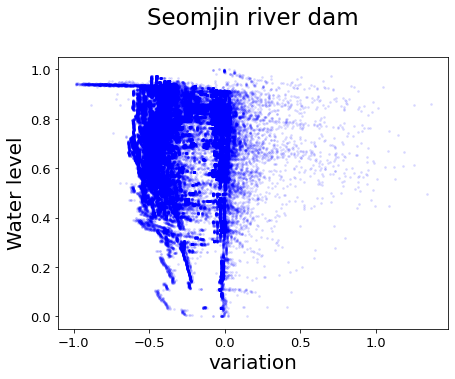

In [53]:
plt.figure(figsize=(7,5))
y= dam_scaled['water_level']
x= dam['variation']
plt.scatter(x,y, s=3, alpha = 0.1, c="blue")
plt.title('Seomjin river dam\n', fontsize = 23)
plt.xlabel('variation', fontsize = 20)
plt.ylabel('Water level', fontsize = 20)
plt.xlim
plt.ylim
plt.xticks(fontsize =13)
plt.yticks(fontsize =13)
plt.show()

<Figure size 432x288 with 0 Axes>

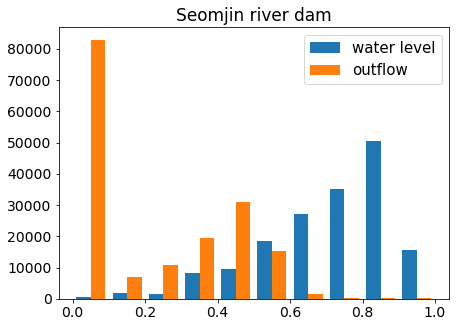

<Figure size 432x288 with 0 Axes>

In [54]:
plt.figure(figsize=(7,5))
plt.hist((dam_scaled.water_level, dam_scaled.outflow), histtype='bar', label=['water level','outflow']) 
plt.title('Seomjin river dam', fontsize = 17)
plt.legend(fontsize=15)
plt.xticks(fontsize =14)
plt.yticks(fontsize =14)
plt.figure()

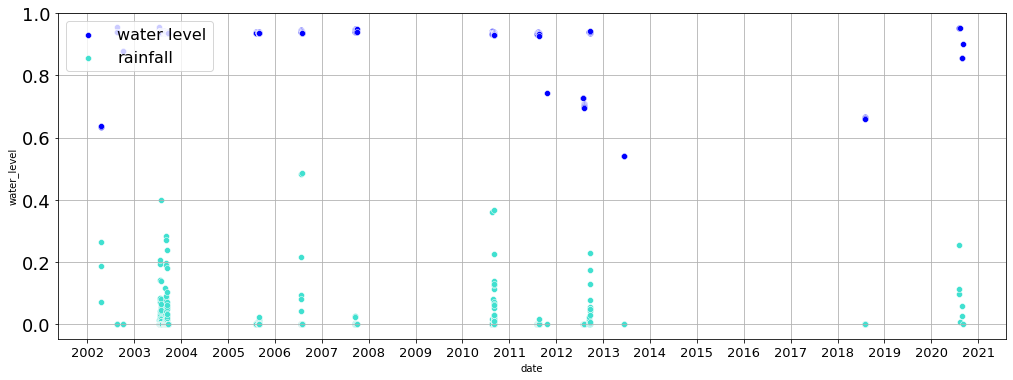

In [601]:
plt.figure(figsize=(17, 6))

pre = sns.scatterplot(data=C.water_level, color='b')
#pre = sns.scatterplot(data=C.outflow, alpha=0.4, color='r')
pre = sns.scatterplot(data=C.rainfall, color='turquoise')

#plt.xlabel('Date', fontsize =26)
plt.grid(True)
plt.legend(labels=["water level", 'rainfall'], fontsize=16, loc='upper left')
plt.xticks(fontsize =13)
plt.yticks(fontsize =18)
#plt.ylim([85,110])
pre.xaxis.set_major_locator(mdates.YearLocator())
pre.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

<Figure size 432x288 with 0 Axes>

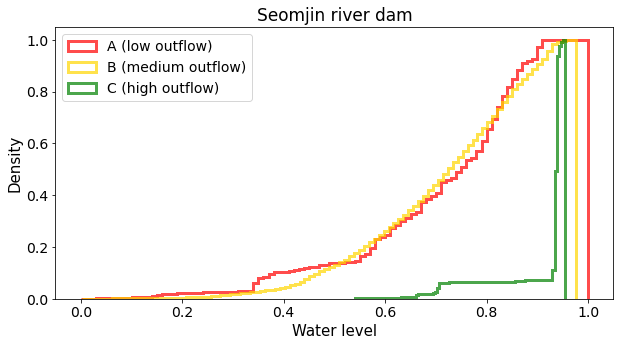

<Figure size 432x288 with 0 Axes>

In [418]:
plt.figure(figsize=(10,5))
plt.hist((A.water_level), bins=100, density=True, alpha=0.7, histtype='step', lw=3, color='r', cumulative=True, label=['A (low outflow)'])
plt.hist((B.water_level), bins=100, density=True, alpha=0.7, histtype='step', lw=3, color='gold', cumulative=True, label=['B (medium outflow)'])
plt.hist((C.water_level), bins=100, density=True, alpha=0.7, histtype='step', lw=3, color='g', cumulative=True, label=['C (high outflow)'])
plt.title('Seomjin river dam', fontsize = 17)
plt.xlabel('Water level', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.legend(fontsize=14, loc='upper left')
plt.xticks(fontsize =14)
plt.yticks(fontsize =14)
plt.figure()

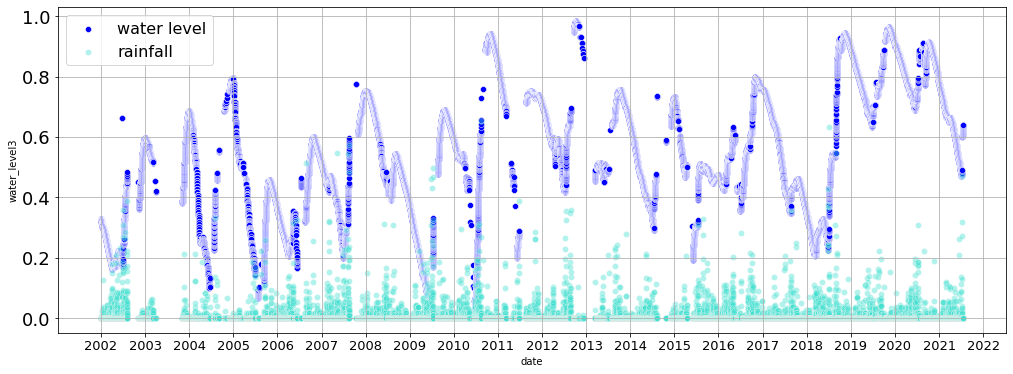

In [897]:
plt.figure(figsize=(17, 6))

pre = sns.scatterplot(data=A.water_level3, color='b')
#pre = sns.scatterplot(data=A.outflow, color='r')
pre = sns.scatterplot(data=A.rainfall3, alpha=0.4, color='turquoise')

#plt.xlabel('Date', fontsize =26)
plt.grid(True)
plt.legend(labels=["water level",'rainfall'], fontsize=16, loc='upper left')
plt.xticks(fontsize =13)
plt.yticks(fontsize =18)
#plt.ylim([85,110])
pre.xaxis.set_major_locator(mdates.YearLocator())
pre.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

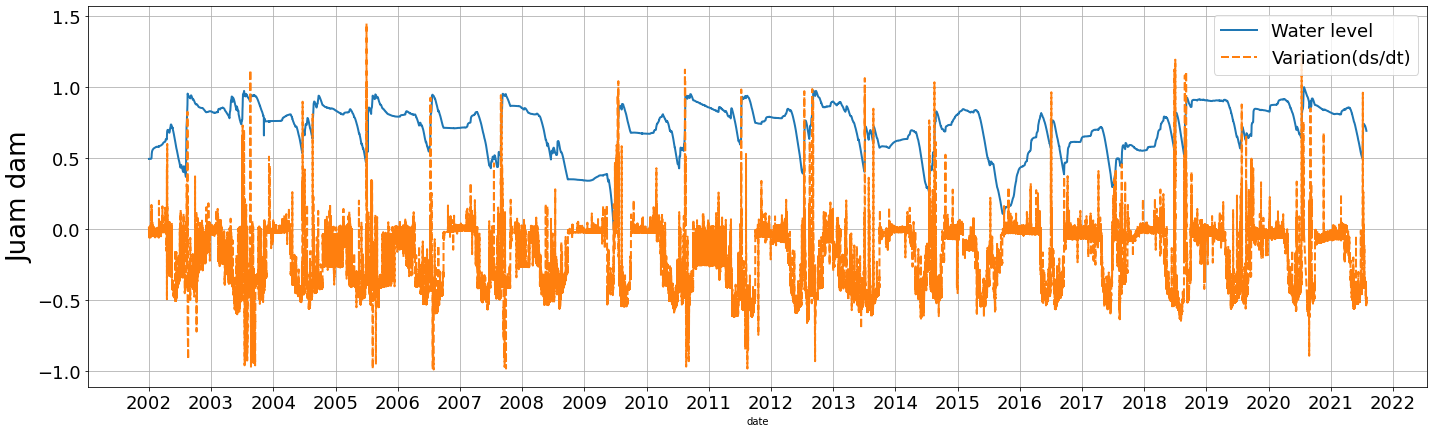

In [185]:
plt.figure(figsize=(24, 7))

pre = sns.lineplot(data=wl_va1, linewidth=2)

plt.ylabel('Juam dam',fontsize = 26)
#plt.xlabel('Date', fontsize =26)
plt.grid(True)
plt.legend(labels=["Water level", "Variation(ds/dt)"], fontsize=18)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
pre.xaxis.set_major_locator(mdates.YearLocator())
pre.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

# 베이지안을 통해 최적화된 하이퍼파라미터를 적용하여 모델 학습 및 예측 수행

In [61]:
dam.describe()

,water_level,rainfall,inflow,outflow,water_level2,rainfall2,inflow2,outflow2,water_level3,rainfall3,inflow3,outflow3,variation,variation2,variation3,ds_dt,ds_dt2,ds_dt3
count,168304.000000,168304.000000,168304.000000,168304.000000,168304.000000,168304.000000,168304.000000,168304.000000,168304.000000,168304.000000,168304.000000,168304.000000,168304.000000,168304.000000,168304.000000,168304.000000,1.683040e+05,168304.000000
mean,185.507351,0.142172,17.599880,15.420396,99.224471,0.153640,23.135969,18.673487,97.398451,0.164576,13.193330,12.577045,-0.202651,0.000845,-0.201904,-0.000003,-5.036955e-08,0.000002
std,5.586687,0.926073,46.197605,13.915455,4.684036,0.980958,53.977039,36.707728,4.603396,1.133088,15.369542,12.649081,0.205464,0.066036,0.223842,0.042101,3.236595e-02,0.154429
min,162.550000,0.000000,0.000000,0.000000,86.200000,0.000000,0.000000,0.000000,85.660000,0.000000,0.000000,0.000000,-0.986601,-0.995402,-0.991665,-1.561433,-1.535472e+00,-1.437249
25%,182.350000,0.000000,1.500000,2.300000,95.910000,0.000000,7.500000,9.700000,94.440000,0.000000,0.000000,0.000000,-0.397086,-0.009567,-0.294212,-0.002701,-2.947083e-03,-0.025995
50%,186.950000,0.000000,3.500000,8.300000,99.370000,0.000000,11.700000,13.000000,97.270000,0.000000,13.900000,13.600000,-0.091843,-0.004910,-0.224078,0.000000,0.000000e+00,0.000000
75%,189.710000,0.000000,24.000000,28.500000,102.700000,0.000000,19.000000,19.100000,100.992500,0.000000,17.200000,17.200000,-0.025662,-0.003030,0.000000,0.002309,2.298851e-03,0.025457
max,194.950000,41.500000,992.600000,68.900000,109.450000,43.500000,997.000000,721.200000,107.260000,60.900000,557.800000,55.100000,1.363916,1.529488,1.484401,1.065319,1.087597e+00,1.109156


In [288]:
#train과 test set 분리
train=dam[:134643]
test=dam[134643:168304]

In [289]:
#sequence length 및 Input과 Output으로 사용할 시점 설정 (window_size는 sequence length를 의미함)
def make_dataset(data, label, window_size=72):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [290]:
#Input과 Output으로 사용할 변수 설정
feature_cols = ['rainfall', 'inflow', 'outflow', 'ds_dt', 'rainfall2', 'inflow2', 'outflow2', 'ds_dt2', 'rainfall3', 'inflow3', 'outflow3', 'ds_dt3']
label_cols = ['water_level2']

train_feature = train[feature_cols]
train_label = train[label_cols]

test_feature = test[feature_cols]
test_label = test[label_cols]


In [291]:
x_train, y_train = make_dataset(train_feature,train_label,72) #make_dataset(input, output, window_size)

In [292]:
x_test, y_test = make_dataset(test_feature,test_label,72)

In [293]:
test_feature.shape

(33661, 12)

모델 구조 및 하이퍼파라미터 설정

In [246]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GRU #LSTM의 경우 GEU단어를 LSTM로 고쳐주면 됨

model_1 = Sequential()
model_1.add(GRU(128, #LSTM
               input_shape=(x_train.shape[1], x_train.shape[2]), 
               activation='relu', 
               return_sequences=True)) 
model_1.add(GRU(64, #LSTM
               input_shape=(x_train.shape[1], x_train.shape[2]), 
               activation='relu',
               return_sequences=False))
model_1.add(Dense(1)) #() output갯수

모델학습

In [247]:
model_1.compile(loss='mean_squared_error', optimizer='adam')


history = model_1.fit(x_train, y_train, 
                    epochs=50, 
                    batch_size=128)

Epoch 1/50
1052/1052 [==============================] - 73s 69ms/step - loss: 141.8516
Epoch 2/50
1052/1052 [==============================] - 73s 69ms/step - loss: 8.7970
Epoch 3/50
1052/1052 [==============================] - 73s 70ms/step - loss: 5.8703
Epoch 4/50
1052/1052 [==============================] - 73s 70ms/step - loss: 4.3958
Epoch 5/50
1052/1052 [==============================] - 74s 71ms/step - loss: 3.5799
Epoch 6/50
1052/1052 [==============================] - 75s 71ms/step - loss: 3.9975
Epoch 7/50
1052/1052 [==============================] - 74s 71ms/step - loss: 2.0091
Epoch 8/50
1052/1052 [==============================] - 75s 72ms/step - loss: 1.6697
Epoch 9/50
1052/1052 [==============================] - 75s 71ms/step - loss: 3.9946
Epoch 10/50
1052/1052 [==============================] - 75s 71ms/step - loss: 1.0979
Epoch 11/50
1052/1052 [==============================] - 76s 72ms/step - loss: 1.0962
Epoch 12/50
1052/1052 [==============================] - 76s 

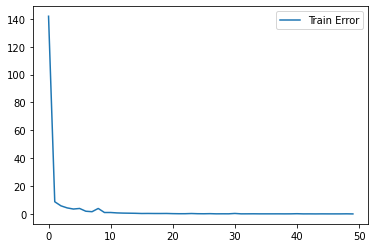

In [248]:
loss_train = pd.DataFrame(history.history)
loss_train['epoch'] = history.epoch

plt.plot(loss_train['epoch'], loss_train['loss'],
           label='Train Error')
plt.legend()

In [265]:
#학습된 모델을 텀퓨터에 저장하여 학습 반복없이 예측 수행할 수 있음. 학습에 시간이 오래 걸리기 때문에 모델 저장이 필요함.
model_1.save("model_sm2d.h5")

In [ ]:
# #위에서 저장했던 모델을 불러올 때 다음 코드를 실행
# from tensorflow.keras.models import load_model
# model_sm2d = load_model('model_sm2d.h5')

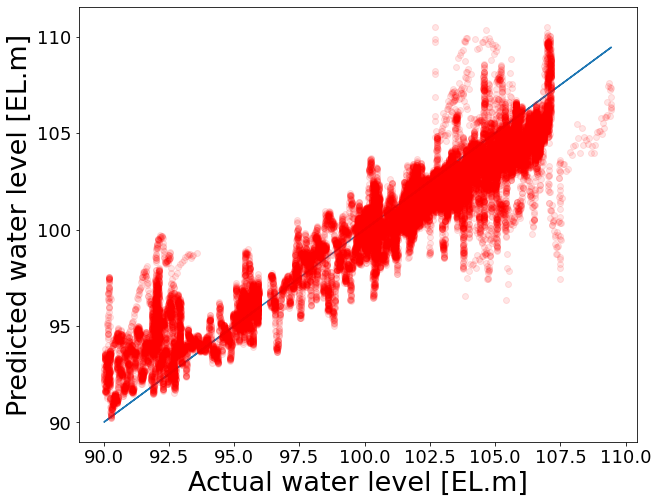

In [294]:
plt.figure(figsize=(10,8))
predict_test  = model_1.predict(x_test)
y = y_test
plt.plot(y_test, y)
plt.plot(y_test,predict_test, 'ro',alpha = 0.1)
plt.xlabel('Actual water level [EL.m]', fontsize =27)
plt.ylabel('Predicted water level [EL.m]', fontsize =27)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.xlim
plt.ylim
plt.show()

# 평가지표 사용

In [295]:
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_squared_log_error

from sklearn.metrics import r2_score

from sklearn.metrics import mean_absolute_percentage_error

In [296]:
print("MAE : " + str(mean_absolute_error(y, predict_test)))

print("MAPE : " + str(mean_absolute_percentage_error(y, predict_test)))

print("MSE : " + str(mean_squared_error(y, predict_test)))

# RMSE
print("RMSE = ", np.sqrt(mean_squared_error(y, predict_test)))

def rmsle(y, predict_test):
    return np.sqrt(np.mean(np.square(np.log1p(y) - np.log1p(predict_test))))

print("RMSLE = ", rmsle(y, predict_test))

print("R2 : " + str(r2_score(y, predict_test)))

MAE : 1.3046268009650406
MAPE : 0.013028952948521815
MSE : 2.9505746806611914
RMSE =  1.7177236915933807
RMSLE =  0.017124248819836176
R2 : 0.870898074270763


In [ ]:
import hydroeval as he
nse = he.evaluator(he.nse, rev_normal_169, y)
kge, r, alpha, beta = he.evaluator(he.kge, rev_normal_169, y)

print(nse, kge)

# 시계열로 예측 결과 시각화

In [317]:
outputs_test2 = pd.DataFrame(y,columns = ['water level'])
outputs_test2['predicted water level'] = predict_test
print(outputs_test2)

       water level  predicted water level
0            95.61              95.509949
1            95.61              95.479210
2            95.61              95.475693
3            95.60              95.493027
4            95.60              95.527328
...            ...                    ...
33584       102.86             101.236557
33585       102.86             101.213852
33586       102.86             101.226036
33587       102.85             101.237587
33588       102.85             101.230774

[33589 rows x 2 columns]


In [5]:
134643+72 #TEST 시작 기간 + window size (date 시각화를 위해)

134715

In [318]:
oo = dam[134715:168304]

In [320]:
Date=pd.DataFrame(oo.index)
Date['date'] = pd.to_datetime(Date.date)
print(Date)

                     date
0     2017-08-31 16:00:00
1     2017-08-31 17:00:00
2     2017-08-31 18:00:00
3     2017-08-31 19:00:00
4     2017-08-31 20:00:00
...                   ...
33584 2021-07-28 12:00:00
33585 2021-07-28 13:00:00
33586 2021-07-28 14:00:00
33587 2021-07-28 15:00:00
33588 2021-07-28 16:00:00

[33589 rows x 1 columns]


In [321]:
outputs_test2

,water level,predicted water level
0,95.61,95.509949
1,95.61,95.479210
2,95.61,95.475693
3,95.60,95.493027
4,95.60,95.527328
...,...,...
33584,102.86,101.236557
33585,102.86,101.213852
33586,102.86,101.226036
33587,102.85,101.237587


In [322]:
outputs_test3 = pd.concat([Date,outputs_test2],axis = 1)

outputs_test3

,date,water level,predicted water level
0,2017-08-31 16:00:00,95.61,95.509949
1,2017-08-31 17:00:00,95.61,95.479210
2,2017-08-31 18:00:00,95.61,95.475693
3,2017-08-31 19:00:00,95.60,95.493027
4,2017-08-31 20:00:00,95.60,95.527328
...,...,...,...
33584,2021-07-28 12:00:00,102.86,101.236557
33585,2021-07-28 13:00:00,102.86,101.213852
33586,2021-07-28 14:00:00,102.86,101.226036
33587,2021-07-28 15:00:00,102.85,101.237587


In [323]:
outputs_test3.index = outputs_test3["date"]

In [324]:
outputs_test3

,date,water level,predicted water level
date,,,
2017-08-31 16:00:00,2017-08-31 16:00:00,95.61,95.509949
2017-08-31 17:00:00,2017-08-31 17:00:00,95.61,95.479210
2017-08-31 18:00:00,2017-08-31 18:00:00,95.61,95.475693
2017-08-31 19:00:00,2017-08-31 19:00:00,95.60,95.493027
2017-08-31 20:00:00,2017-08-31 20:00:00,95.60,95.527328
...,...,...,...
2021-07-28 12:00:00,2021-07-28 12:00:00,102.86,101.236557
2021-07-28 13:00:00,2021-07-28 13:00:00,102.86,101.213852
2021-07-28 14:00:00,2021-07-28 14:00:00,102.86,101.226036


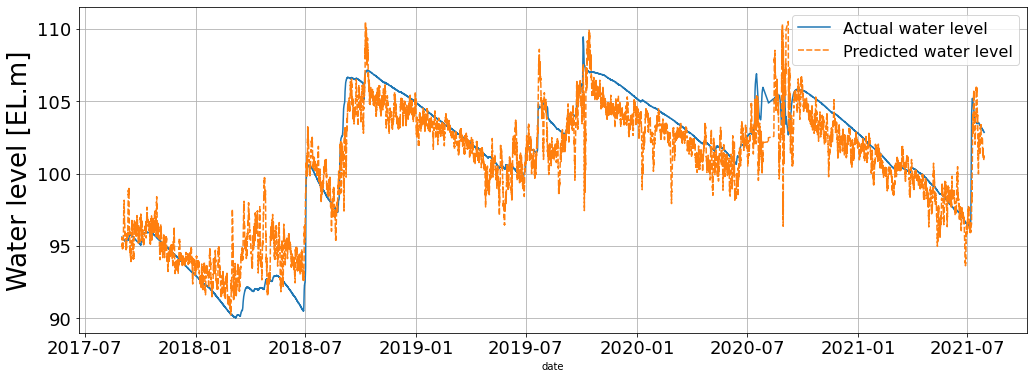

In [325]:
plt.figure(figsize=(17, 6))

pre = sns.lineplot(data=outputs_test3)

plt.ylabel('Water level [EL.m]',fontsize = 26)
#plt.xlabel('Date', fontsize =26)
plt.grid(True)
plt.legend(labels=["Actual water level", "Predicted water level"], fontsize=16)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
#pre.xaxis.set_major_locator(mdates.YearLocator())
#pre.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

# Noise가 있는 예측값을 이동평균 방법을 통해 부드러운 (가는) 선으로 만들어줌

In [438]:
rev_normal_169 = pd.DataFrame(predict_test)
rev_normal_169 = rev_normal_169.ewm(span=9*24).mean() #span은 이동평균을 위한 시간(길이)

In [439]:
outputs_test4 = pd.DataFrame(y,columns = ['water level obs'])
outputs_test4['water level pre'] = rev_normal_169
print(outputs_test4)

       water level obs  water level pre
0                95.61        95.509949
1                95.61        95.494508
2                95.61        95.488178
3                95.60        95.489407
4                95.60        95.497133
...                ...              ...
33584           102.86       102.001124
33585           102.86       101.993868
33586           102.86       101.986792
33587           102.85       101.979887
33588           102.85       101.972982

[33589 rows x 2 columns]


In [440]:
outputs_test4 = pd.concat([Date,outputs_test4],axis = 1)

outputs_test4.index = outputs_test4["date"]

In [441]:
outputs_test4

,date,water level obs,water level pre
date,,,
2017-08-31 16:00:00,2017-08-31 16:00:00,95.61,95.509949
2017-08-31 17:00:00,2017-08-31 17:00:00,95.61,95.494508
2017-08-31 18:00:00,2017-08-31 18:00:00,95.61,95.488178
2017-08-31 19:00:00,2017-08-31 19:00:00,95.60,95.489407
2017-08-31 20:00:00,2017-08-31 20:00:00,95.60,95.497133
...,...,...,...
2021-07-28 12:00:00,2021-07-28 12:00:00,102.86,102.001124
2021-07-28 13:00:00,2021-07-28 13:00:00,102.86,101.993868
2021-07-28 14:00:00,2021-07-28 14:00:00,102.86,101.986792


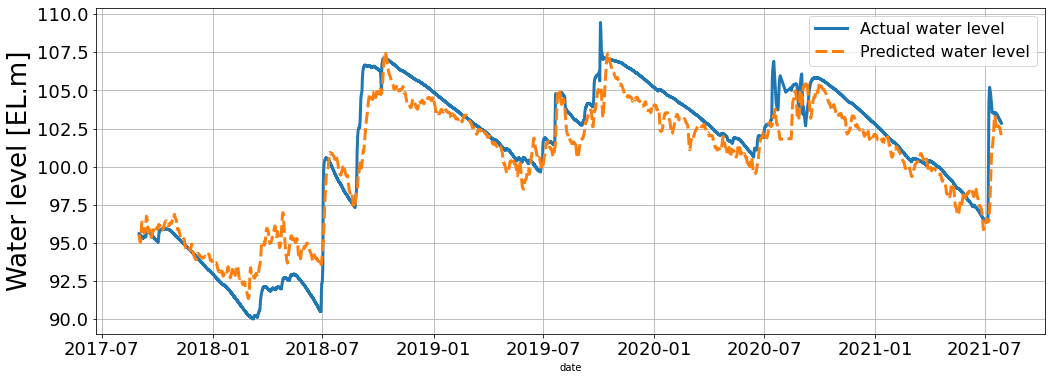

In [442]:
plt.figure(figsize=(17, 6))

pre = sns.lineplot(data=outputs_test4, linewidth=3)

plt.ylabel('Water level [EL.m]',fontsize = 26)
#plt.xlabel('Date', fontsize =26)
plt.grid(True)
plt.legend(labels=["Actual water level", "Predicted water level"], fontsize=16)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.show()

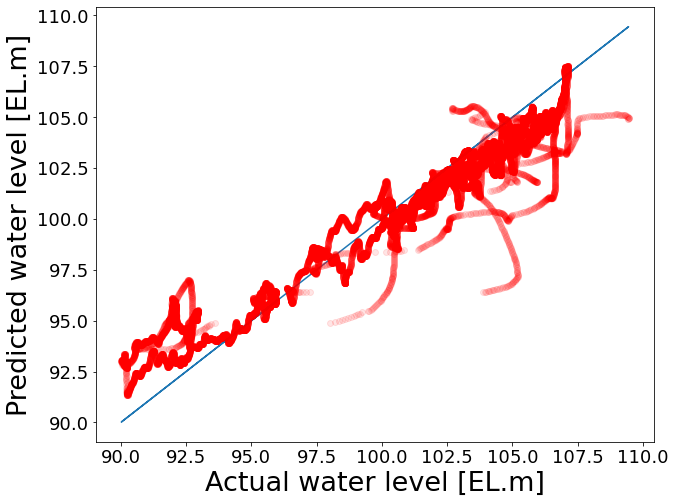

In [443]:
plt.figure(figsize=(10,8))
predict_test  = model_sm2d.predict(x_test)
y = y_test
plt.plot(y_test, y)
plt.plot(y_test,rev_normal_169, 'ro',alpha = 0.1)
plt.xlabel('Actual water level [EL.m]', fontsize =27)
plt.ylabel('Predicted water level [EL.m]', fontsize =27)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.xlim
plt.ylim
plt.show()

In [445]:
import hydroeval as he
nse = he.evaluator(he.nse, rev_normal_169, y)
kge, r, alpha, beta = he.evaluator(he.kge, rev_normal_169, y)

print(nse, kge)

[0.90233395] [0.77861807]


In [446]:
print("MAE : " + str(mean_absolute_error(y, rev_normal_169)))

print("MAPE : " + str(mean_absolute_percentage_error(y, rev_normal_169)))

print("MSE : " + str(mean_squared_error(y, rev_normal_169)))

# RMSE
print("RMSE = ", np.sqrt(mean_squared_error(y, rev_normal_169)))

print("R2 : " + str(r2_score(y, rev_normal_169)))


MAE : 1.154936257158357
MAPE : 0.011543931075070669
MSE : 2.2321197831998507
RMSE =  1.494028039629729
R2 : 0.9023339540062576


In [447]:
#data.to_csv('sm2t.csv')